# Detecting and organising images using Convolutional Neural Networks

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import os
from keras.layers import Flatten, Dense, Dropout
from keras.layers.pooling import MaxPooling2D, AvgPool2D
from keras.layers.convolutional import Conv2D
from keras import Sequential
from keras.activations import relu, softmax
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Using TensorFlow backend.


## Building methods to read and label the training image data

In [2]:
class_names = ['category 1', 'category 2', 'category 3', 'category 4']
class_names_label = {label:i for i, label in enumerate(class_names)}

In [3]:
#Uncomment and run this cell if using google colab and the data is hosted in google drive

#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
def load_data():
    dataset = '../Dataset/train'    #Give the directory path in which the data is present in the drive if using colab

    images = []
    labels = []
        
    print("Loading {}".format(dataset))
        
    # Iterate through each folder corresponding to a category
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
            
        # Iterate through each image in our folder
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
            # Get the path name of the image
            img_path = os.path.join(os.path.join(dataset, folder), file)
                
            # Open and resize the img
            image = cv2.imread(img_path)
            image = cv2.resize(image, (150, 150))
                
            # Append the image and its corresponding label to the output
            images.append(image)
            labels.append(label)
                
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')   
        
    return (images, labels)


In [5]:
def load_test_data():
    dataset = '../Dataset/test'    #Give the directory path in which the data is present in drive if using colab

    images = []
    image_id = []
        
    print("Loading {}".format(dataset))
        
    # Iterate through each image in our folder
    for file in tqdm(os.listdir(dataset)):
                
        # Get the path name of the image
        img_path = os.path.join(dataset, file)
                
        # Open and resize the img
        image = cv2.imread(img_path)
        image = cv2.resize(image, (150, 150))
                
        # Append the image and its corresponding label to the output
        images.append(image)
        image_id.append(file)        
    images = np.array(images, dtype = 'float32')  
        
    return image_id, images


## Load the training image set and their labels

In [6]:
train_images, train_labels = load_data()

Loading ../Dataset/train
100%|██████████| 119/119 [00:04<00:00, 26.46it/s]


In [7]:
train_images.shape, train_labels.shape

((440, 150, 150, 3), (440,))

In [8]:
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
# See a sample training image
plt.imshow(train_images[200])
plt.show()
print(train_labels[200]+1)

## Building a CNN Deep Learning model

In [10]:
model = Sequential([ 
      Conv2D(64, (7, 7), padding='SAME', activation='relu', input_shape=(150, 150, 3)),
      AvgPool2D(),
      Flatten(),
      Dense(128, activation=relu),
      Dropout(0.4),
      Dense(4, activation=softmax)
])

## Compile and train the model on training images

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=32, epochs=25)

racy: 0.979128/440 [=======>......................] - ETA: 15s - loss: 0.1180 - accuracy: 0.984160/440 [=========>....................] - ETA: 13s - loss: 0.1066 - accuracy: 0.981192/440 [============>.................] - ETA: 11s - loss: 0.0888 - accuracy: 0.984224/440 [==============>...............] - ETA: 10s - loss: 0.0761 - accuracy: 0.986256/440 [================>.............] - ETA: 8s - loss: 0.0666 - accuracy: 0.98288/440 [==================>...........] - ETA: 7s - loss: 0.0607 - accuracy: 0.98320/440 [====================>.........] - ETA: 5s - loss: 0.0550 - accuracy: 0.99352/440 [=======================>......] - ETA: 4s - loss: 0.0500 - accuracy: 0.99384/440 [=========================>....] - ETA: 2s - loss: 0.0684 - accuracy: 0.98416/440 [===========================>..] - ETA: 1s - loss: 0.0631 - accuracy: 0.99440/440 [==============================] - 21s 49ms/step - loss: 0.0689 - accuracy: 0.9886
Epoch 10/25
 32/440 [=>............................] - ETA: 41s - loss

In [ ]:
# Save the trained model
model.save('../Models/CNN_Model_01.h5')

[0, 11, 0, 1]

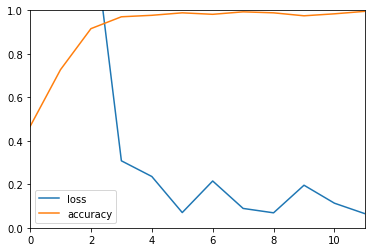

In [13]:
# Plot the training curves using models history parameters
pd.DataFrame(history.history).plot()
plt.axis([0, 11, 0, 1])

## Predict and evaluate the model 

In [14]:
train_predictions = model.predict_classes(train_images, batch_size=44)


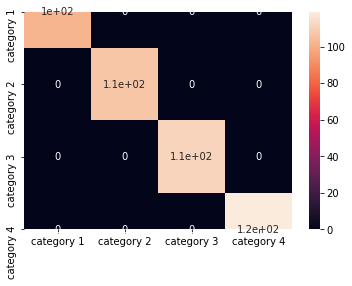

In [15]:
sns.heatmap(confusion_matrix(train_labels, train_predictions), annot=True, xticklabels=class_names, yticklabels=class_names)
plt.show()

In [16]:
print(confusion_matrix(train_labels, train_predictions))

[[102   0   0   0]
 [  0 107   0   0]
 [  0   0 112   0]
 [  0   0   0 119]]


Predicted category: [3]
Actual category: 3
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


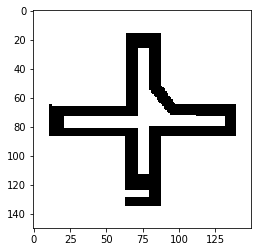

In [17]:
some_image = train_images[400]
some_image_label = train_labels[400]
print(f"Predicted category: {model.predict_classes(some_image.reshape(1, 150, 150, 3))}")
print(f"Actual category: {some_image_label}")
plt.imshow(some_image)
plt.show()

Image below belongs to category 1


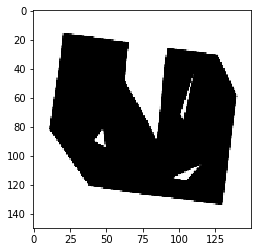

In [18]:
#Load some sample image from test set
test_sample = cv2.imread('../Dataset/test/Test_original_1051.png_271f7fb1-f0ab-4ca7-9dae-a352fd0ed8b9.png')
test_sample = cv2.resize(test_sample, (150, 150))
print(f"Image below belongs to category {int(model.predict_classes(test_sample.reshape(1, 150, 150, 3)))+1}")
plt.imshow(test_sample)
plt.show()

## Categorizing the unlabeled test images into respective folders based on the model's predictions

In [19]:
# Load the test images set
test_image_id, test_images=load_test_data()

Loading ../Dataset/test
100%|██████████| 30/30 [01:45<00:00,  3.51s/it]


In [20]:
# Get the model's predicted label for each test image
test_predictions = model.predict_classes(test_images, verbose=2)

In [21]:
# Build a dataframe with the Image ID and respective prediction of the model
results_df=pd.DataFrame({
    "Image ID": test_image_id,
    "Predicted Labels": test_predictions
}).set_index("Image ID")

In [22]:
results_df.head(20)

,Predicted Labels
Image ID,
1051.png,0
1052.png,0
4043.png,1
4050.png,2
4051.png,2
4052.png,2
6052.png,1
6053.png,1
C052.png,3


In [23]:
# Method to convert the integer class label to the actual folder name
def label2class(label):
  return "category "+str(label+1)
results_df["Class"] = results_df["Predicted Labels"].apply(label2class)
results_df.drop('Predicted Labels', axis=1, inplace=True)

In [24]:
# Save the results to a csv file
results_df.to_csv("../Dataset/results2.csv")

In [25]:
list(results_df.loc['1052.png'])[0]

'category 1'

In [26]:
# Import shutil to do the file movement from one folder to the other
import shutil

In [35]:
# code to put the test image into respective folder based on model's prediction
source = '../Dataset/test'
destination = '../Dataset/predicted categories/'
files = os.listdir(source)
for file in files:
  shutil.move(f"{source}/{file}",f"{destination}"+list(results_df.loc[file])[0])